In [2]:
import mne
import pandas as pd

In [3]:
data = pd.read_csv('data/gip_A00054817001.csv')
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.183466,0.183467,0.183468,0.183469,0.183470,0.183471,0.183472,0.183473,0.183474,0.183475
0,-33.55000,-33.334000,-32.48600,-32.14000,-32.55900,-32.0810,-32.14800,-30.95400,-30.239000,-31.159000,...,-6.17860,-8.0460,-6.28700,-6.3082,-7.2309,-7.4439,-7.2819,-6.5939,-5.9817,-6.1898
1,-26.15800,-25.843000,-25.15900,-24.56500,-24.72400,-24.7460,-24.34600,-23.14400,-21.969000,-22.618000,...,-0.82499,-1.9725,-0.55053,-1.0588,-2.2144,-2.6975,-2.4553,-1.6927,-1.5516,-1.7619
2,-49.94200,-49.740000,-48.56600,-47.60600,-47.93100,-47.3470,-47.05300,-45.70200,-44.136000,-45.474000,...,-7.86960,-9.9724,-8.43940,-8.2560,-9.4914,-9.7641,-9.2898,-8.4312,-7.7770,-8.1103
3,-41.94000,-41.954000,-40.89200,-39.98200,-40.20900,-39.7450,-39.37300,-37.99200,-36.297000,-37.486000,...,-5.14520,-7.3551,-5.62800,-5.4045,-6.1018,-6.2435,-5.8668,-5.3843,-5.0351,-5.6301
4,-32.91900,-33.056000,-32.46200,-31.44400,-31.66000,-31.1710,-30.90100,-29.22300,-27.924000,-28.894000,...,-2.62090,-3.5763,-3.29370,-2.9742,-3.7893,-3.9660,-3.7165,-3.3035,-2.8450,-3.1524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-0.10341,-0.087197,-0.10509,-0.41212,-0.57702,-0.8714,-0.97448,-0.74531,-0.742440,-0.995110,...,2.63280,2.1227,2.71320,2.7088,2.4890,2.2535,2.2961,2.7385,2.8674,2.8515
106,32.53700,32.712000,32.65700,31.95700,32.01600,31.4300,31.23300,31.01700,30.408000,30.923000,...,9.82560,11.2490,11.06900,10.8830,10.4910,10.1880,10.1060,9.6142,9.0291,8.9832
107,17.61500,18.274000,18.85900,18.39900,18.49800,17.9560,18.09500,18.38600,18.681000,18.968000,...,9.46990,10.0530,10.80400,9.4442,8.6215,8.1817,8.3117,8.1053,7.2559,7.2372
108,-2.54660,-2.138500,-1.60930,-1.43180,-1.45440,-1.8480,-1.38760,-0.80250,-0.020022,-0.023821,...,5.31790,5.2205,6.32620,5.5829,4.5769,3.9396,4.0191,4.2779,3.7108,3.4992


In [4]:
data1 = pd.read_csv('data/gip_A00054817001_interpolated_channels.csv')
data1

,29,35,84,86,93,107,111,10,16,49


In [6]:
data2 = pd.read_csv('data/gip_A00054817001_events.csv')
data2

,type,value,latency,duration,urevent,Unnamed: 5
0,90,trigger,2091,0,1,NaN
1,type,value,latency,duration,urevent,NaN
2,20,trigger,31225,0,2,NaN
3,type,value,latency,duration,urevent,NaN
4,30,trigger,41224,0,3,NaN
5,type,value,latency,duration,urevent,NaN
6,20,trigger,61223,0,4,NaN
7,type,value,latency,duration,urevent,NaN
8,30,trigger,71223,0,5,NaN
9,type,value,latency,duration,urevent,NaN


In [40]:
import numpy as np
import mne

# Read the CSV file as a NumPy array and convert
data = np.loadtxt('data/gip_A00054817001.csv', delimiter=',')
data = pd.DataFrame(data)[1:].reset_index(drop=True)
data

,0,1,2,3,4,5,6,7,8,9,...,183466,183467,183468,183469,183470,183471,183472,183473,183474,183475
0,-33.55000,-33.334000,-32.48600,-32.14000,-32.55900,-32.0810,-32.14800,-30.95400,-30.239000,-31.159000,...,-6.17860,-8.0460,-6.28700,-6.3082,-7.2309,-7.4439,-7.2819,-6.5939,-5.9817,-6.1898
1,-26.15800,-25.843000,-25.15900,-24.56500,-24.72400,-24.7460,-24.34600,-23.14400,-21.969000,-22.618000,...,-0.82499,-1.9725,-0.55053,-1.0588,-2.2144,-2.6975,-2.4553,-1.6927,-1.5516,-1.7619
2,-49.94200,-49.740000,-48.56600,-47.60600,-47.93100,-47.3470,-47.05300,-45.70200,-44.136000,-45.474000,...,-7.86960,-9.9724,-8.43940,-8.2560,-9.4914,-9.7641,-9.2898,-8.4312,-7.7770,-8.1103
3,-41.94000,-41.954000,-40.89200,-39.98200,-40.20900,-39.7450,-39.37300,-37.99200,-36.297000,-37.486000,...,-5.14520,-7.3551,-5.62800,-5.4045,-6.1018,-6.2435,-5.8668,-5.3843,-5.0351,-5.6301
4,-32.91900,-33.056000,-32.46200,-31.44400,-31.66000,-31.1710,-30.90100,-29.22300,-27.924000,-28.894000,...,-2.62090,-3.5763,-3.29370,-2.9742,-3.7893,-3.9660,-3.7165,-3.3035,-2.8450,-3.1524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-0.10341,-0.087197,-0.10509,-0.41212,-0.57702,-0.8714,-0.97448,-0.74531,-0.742440,-0.995110,...,2.63280,2.1227,2.71320,2.7088,2.4890,2.2535,2.2961,2.7385,2.8674,2.8515
106,32.53700,32.712000,32.65700,31.95700,32.01600,31.4300,31.23300,31.01700,30.408000,30.923000,...,9.82560,11.2490,11.06900,10.8830,10.4910,10.1880,10.1060,9.6142,9.0291,8.9832
107,17.61500,18.274000,18.85900,18.39900,18.49800,17.9560,18.09500,18.38600,18.681000,18.968000,...,9.46990,10.0530,10.80400,9.4442,8.6215,8.1817,8.3117,8.1053,7.2559,7.2372
108,-2.54660,-2.138500,-1.60930,-1.43180,-1.45440,-1.8480,-1.38760,-0.80250,-0.020022,-0.023821,...,5.31790,5.2205,6.32620,5.5829,4.5769,3.9396,4.0191,4.2779,3.7108,3.4992


In [44]:
#Specify the channels

#Create a list of the channels
ch_names = [str(el) for el in list(data.T.columns)]

#Specify the sampling rate being used
sfreq = 500 #Hz

ch_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109']

In [82]:
info = mne.create_info(ch_names, sfreq)
# ch_types='eeg')
info

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 110 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 110
 projs: []
 sfreq: 500.0 Hz
>

Creating RawArray with float64 data, n_channels=110, n_times=183476
    Range : 0 ... 183475 =      0.000 ...   366.950 secs
Ready.


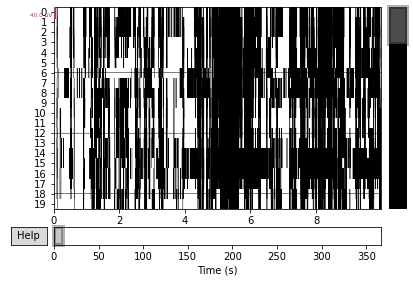

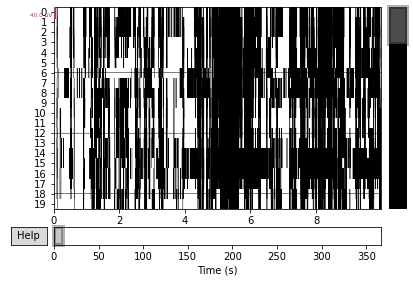

In [83]:
#Create raw object ready for preprocessing
raw = mne.io.RawArray(data, info)
raw.plot()

In [74]:
#Raw object as dataframe for visualization
raw.to_data_frame()

,time,0,1,2,3,4,5,6,7,8,...,100,101,102,103,104,105,106,107,108,109
0,0,-33.5500,-26.1580,-49.9420,-41.9400,-32.9190,-20.8050,0.0,8.2440,-26.75900,...,23.629,43.528,21.9230,-30.6840,4.8978,-0.103410,32.5370,17.6150,-2.5466,-16.1900
1,2,-33.3340,-25.8430,-49.7400,-41.9540,-33.0560,-21.0610,0.0,8.4409,-26.56400,...,23.725,44.209,22.0150,-30.5270,4.6375,-0.087197,32.7120,18.2740,-2.1385,-16.2900
2,4,-32.4860,-25.1590,-48.5660,-40.8920,-32.4620,-20.8690,0.0,8.2171,-26.14800,...,23.626,43.966,22.2740,-29.5210,4.3968,-0.105090,32.6570,18.8590,-1.6093,-16.0970
3,6,-32.1400,-24.5650,-47.6060,-39.9820,-31.4440,-20.2410,0.0,8.5900,-25.47600,...,22.273,42.826,21.8020,-28.8870,3.7329,-0.412120,31.9570,18.3990,-1.4318,-15.9100
4,8,-32.5590,-24.7240,-47.9310,-40.2090,-31.6600,-20.3780,0.0,8.9439,-25.43200,...,21.669,42.798,21.9110,-29.2580,3.1623,-0.577020,32.0160,18.4980,-1.4544,-16.1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183471,366942,-7.4439,-2.6975,-9.7641,-6.2435,-3.9660,-3.9064,0.0,5.3987,-1.67620,...,10.089,13.343,9.0178,-4.0686,5.1184,2.253500,10.1880,8.1817,3.9396,-4.8413
183472,366944,-7.2819,-2.4553,-9.2898,-5.8668,-3.7165,-3.8976,0.0,5.4822,-1.38050,...,10.474,13.211,9.2644,-3.5460,5.3767,2.296100,10.1060,8.3117,4.0191,-4.7195
183473,366946,-6.5939,-1.6927,-8.4312,-5.3843,-3.3035,-3.3788,0.0,5.5687,-0.79016,...,10.491,12.792,8.7666,-2.9252,5.6972,2.738500,9.6142,8.1053,4.2779,-4.2925
183474,366948,-5.9817,-1.5516,-7.7770,-5.0351,-2.8450,-2.7842,0.0,4.8535,-0.61490,...,10.430,11.521,8.0472,-2.7702,6.1300,2.867400,9.0291,7.2559,3.7108,-3.9459


In [75]:
picks = raw.pick_channels(['1', '2'])

In [81]:
ica = mne.preprocessing.ICA(n_components=2, random_state=97, max_iter=800)
ica.fit(raw, picks='all')  # details on how we picked these are omitted here
ica.plot_properties(raw)

ValueError: Invalid channel type passed for ICA: {'misc'}.Only the following types are supported: ('mag', 'grad', 'eeg', 'csd', 'seeg', 'ecog', 'hbo', 'hbr', 'fnirs_cw_amplitude', 'fnirs_fd_ac_amplitude', 'fnirs_fd_phase', 'fnirs_od', 'eog')

Effective window size : 4.096 (s)


<ipython-input-80-15ed251609cb>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks='all')


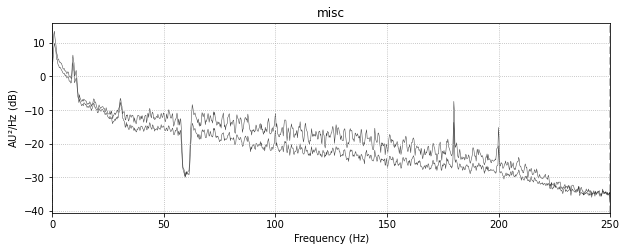

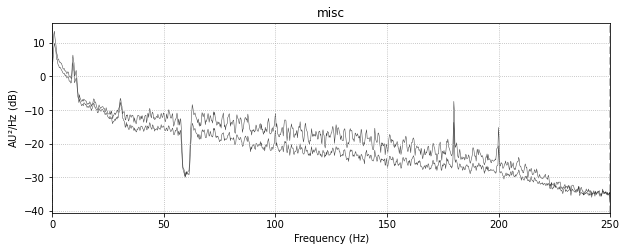

In [80]:
raw.plot_psd(picks='all')